<a href="https://colab.research.google.com/github/ParamitaDas18/ML_Lab_Codes/blob/main/Q2_Lasso_Ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls


housing_price_dataset.csv  sample_data


In [ ]:
import pandas as pd
data = pd.read_csv("housing_price_dataset.csv")
print(data.head())

   Area  Bedroom  Age    Price
0  1000        2     5  300000
1  1500        3     7  400000
2  1200        2     4  350000
3  1800        4    10  500000
4  2000        3    12  520000


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarnin

Best alpha (Lasso): {'alpha': np.float64(0.001)}
R² (Lasso): 0.7881944641922495
MAE (Lasso): 27499.998774274136
MSE (Lasso): 762499928.907902

Best alpha (Ridge): {'alpha': np.float64(0.001)}
R² (Ridge): 0.9022191028185228
MAE (Ridge): 16988.46833654691
MSE (Ridge): 352011229.85331804


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

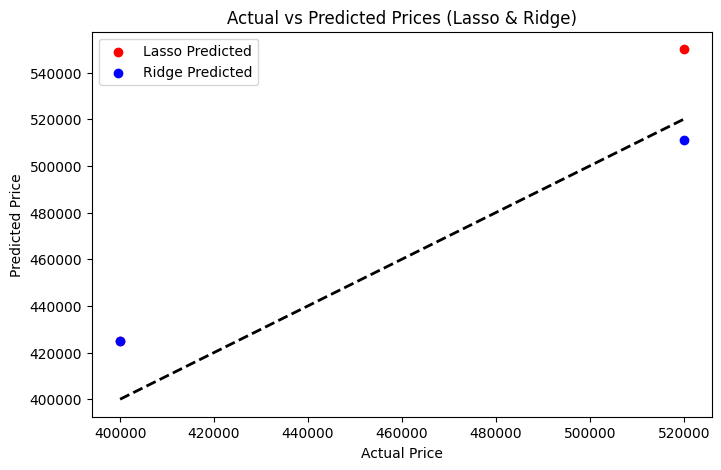

In [ ]:
# ✅ Lasso and Ridge Regression with hyperparameter tuning
# Works even if your dataset is small

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("housing_price_dataset.csv")

# Separate features and target
X = data.drop("Price", axis=1)
y = data["Price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- LASSO REGRESSION ---
lasso = Lasso(max_iter=10000)
params_lasso = {'alpha': np.logspace(-3, 2, 20)}  # range of alpha values
lasso_cv = GridSearchCV(lasso, params_lasso, cv=2)  # reduced to cv=2
lasso_cv.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_cv.best_estimator_.predict(X_test_scaled)

print("Best alpha (Lasso):", lasso_cv.best_params_)
print("R² (Lasso):", r2_score(y_test, y_pred_lasso))
print("MAE (Lasso):", mean_absolute_error(y_test, y_pred_lasso))
print("MSE (Lasso):", mean_squared_error(y_test, y_pred_lasso))

# --- RIDGE REGRESSION ---
ridge = Ridge(max_iter=10000)
params_ridge = {'alpha': np.logspace(-3, 2, 20)}
ridge_cv = GridSearchCV(ridge, params_ridge, cv=2)  # reduced to cv=2
ridge_cv.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_cv.best_estimator_.predict(X_test_scaled)

print("\nBest alpha (Ridge):", ridge_cv.best_params_)
print("R² (Ridge):", r2_score(y_test, y_pred_ridge))
print("MAE (Ridge):", mean_absolute_error(y_test, y_pred_ridge))
print("MSE (Ridge):", mean_squared_error(y_test, y_pred_ridge))

# --- Plot Actual vs Predicted ---
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lasso, color='red', label='Lasso Predicted')
plt.scatter(y_test, y_pred_ridge, color='blue', label='Ridge Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Lasso & Ridge)")
plt.legend()
plt.show()